### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

import seaborn as sns

1) Calculate correlations between amoc and the following transports:

    They are extracted here: [mep22dku@c0004 ~/scratch/AMOC-PLANKTOM/extraction-scripts]$ python syst-transports.py

transports are made in extraction-scripts/transporter.py


    [] total net northward water, NO3, DIC from climate-varying co2-constant run (RVD0) (row 73-110)
        - annual
            - years 1950-2020
            - years 1980-2020
        - monthly
            - years 1950-2020
            - years 1980-2020

    2) Calculate correlation between amoc and net Fnat-ss (RVD0-RVB0)

## AMOC vs transports, monthly and yearly

In [4]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_1950_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_1950_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_water_1950_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_water_1950_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_1950_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_1950_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

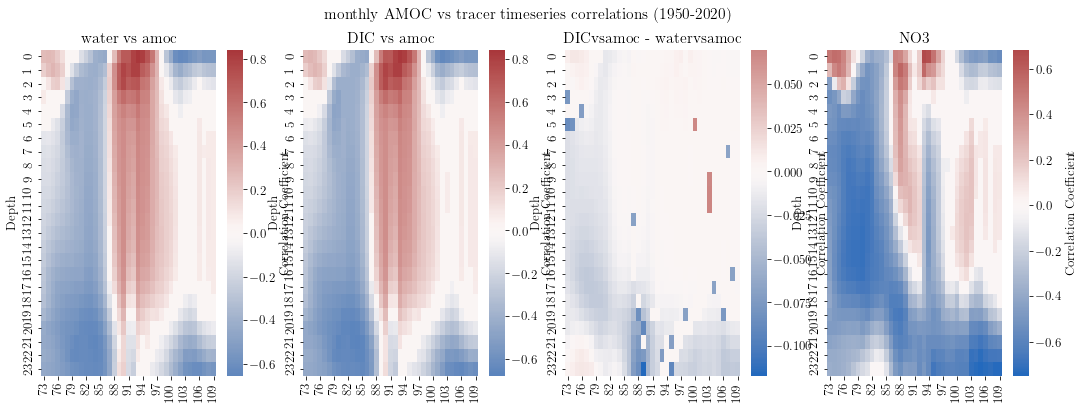

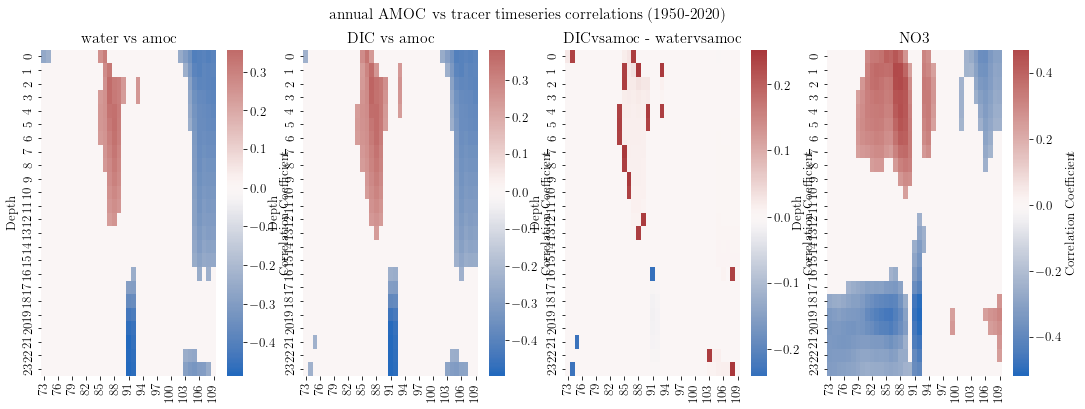

In [5]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_water_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_water_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_m-RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc']
plt.suptitle('monthly AMOC vs tracer timeseries correlations (1950-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

    
### annual
    
fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_a-RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

plt.suptitle('annual AMOC vs tracer timeseries correlations (1950-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

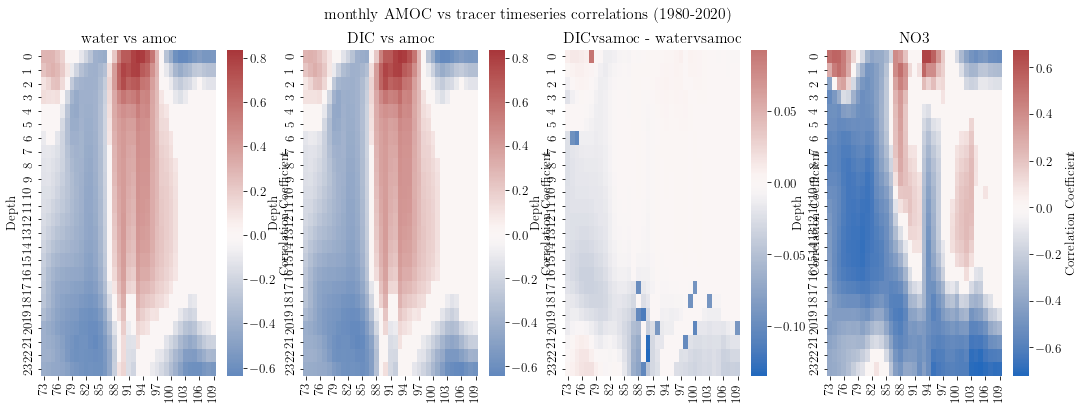

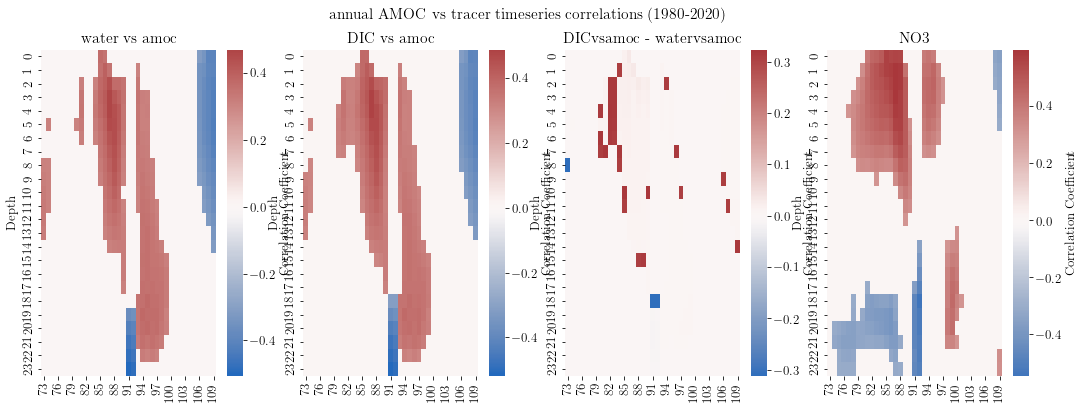

In [6]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

RVD0_net_water_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_water_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_m-RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc']
plt.suptitle('monthly AMOC vs tracer timeseries correlations (1980-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

    
### annual
    
fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_a-RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

plt.suptitle('annual AMOC vs tracer timeseries correlations (1980-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

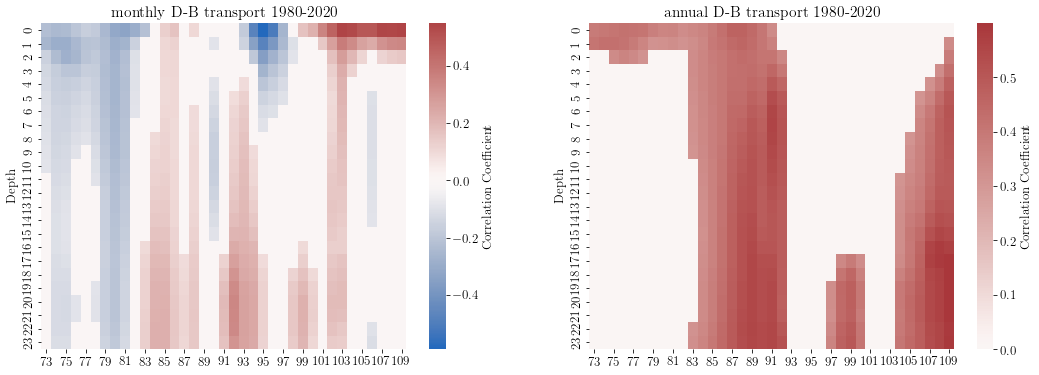

In [7]:
RVD0_net_DIC_m = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

fig, axs = plt.subplots(1,2, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])
sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

tits = ['monthly D-B transport 1980-2020', 'annual D-B transport 1980-2020']
for i in range(0,2):
    axs[i].set_title(tits[i])

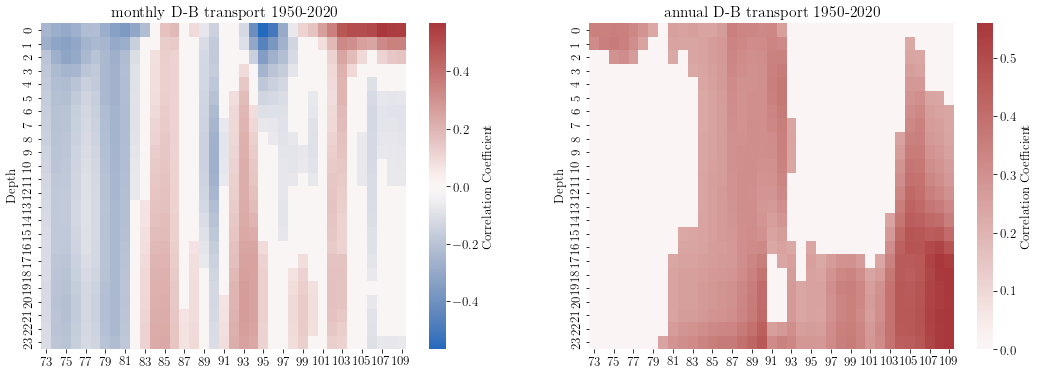

In [8]:
RVD0_net_DIC_m = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

fig, axs = plt.subplots(1,2, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])
sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

tits = ['monthly D-B transport 1950-2020', 'annual D-B transport 1950-2020']
for i in range(0,2):
    axs[i].set_title(tits[i])

### Transport hovmoller

In [143]:



w.nav_lon
nav_lat = w.nav_lat.isel(x=range(80,160)).isel(y=range(60,110)).\
    mean(dim='x', skipna=True)
#print(nav_lat.values)


105.96992


In [159]:
tri = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'


# nav_lat = DIC.nav_lat.isel(x=range(80,160)).isel(y=range(70,149)).\
#     mean(dim='x', skipna=True)

trac = 'DIC'; mod = 'RVD0'; d = 21; typ = 'net'

def get_hovno_water(trac,mod,d,typ):

    
    savenam = f'./data/{mod}-water-{typ}-transport_d{d}.nc'
    print(savenam)
    
    tmat = np.zeros([70*12,110-60])
    times = pd.date_range(f"{1950}/01/01",f"{2020}/01/01",freq='MS',closed='left')

    ind = 0
    for y in range(1950,2020):
        print(y)
        for row in range(60,110):
            fnam = glob.glob(f'{tri}/{mod}_{y}_{trac}_row{row}*.nc')
            w = xr.open_dataset(fnam[0])
            tdat = w.water_transports.isel(depthlevel = d).sel(type = typ).values
            tmat[ind:ind+12,row-60] = tdat
        ind = ind+12


    data_vars = {'transport':(['time_counter', 'lat'], tmat,
    {'units': 'm3/s',
    'long_name':''}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),
            
    'nav_lat': (['lat'], nav_lat.values),}
    # define global attributes
    attrs = {'made in':'scratch/AMOC-PLANKTOM/systematic_transports.ipynb',
    'desc': 'transports'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)
    
def get_hovno_trac(trac,mod,d,typ):

    
    savenam = f'./data/{mod}-{trac}-{typ}-transport_d{d}.nc'
    print(savenam)
    
    tmat = np.zeros([70*12,110-60])
    times = pd.date_range(f"{1950}/01/01",f"{2020}/01/01",freq='MS',closed='left')

    ind = 0
    for y in range(1950,2020):
        print(y)
        for row in range(60,110):
            fnam = glob.glob(f'{tri}/{mod}_{y}_{trac}_row{row}*.nc')
            w = xr.open_dataset(fnam[0])
            tdat = w.tracer_transports.isel(depthlevel = d).sel(type = typ).values
            tmat[ind:ind+12,row-60] = tdat
        ind = ind+12


    data_vars = {'transport':(['time_counter', 'lat'], tmat,
    {'units': 'm3/s',
    'long_name':''}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),
            
    'nav_lat': (['lat'], nav_lat.values),}
    # define global attributes
    attrs = {'made in':'scratch/AMOC-PLANKTOM/systematic_transports.ipynb',
    'desc': 'transports'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)
    
    print('hovtovo')
    
#trac = 'DIC'; mod = 'RVD0'; d = 21; typ = 'net'
#get_hovno_water(trac,mod,d,typ)
# get_hovno_trac(trac,mod,d,typ)

# trac = 'DIC'; mod = 'RVD0'; d = 10; typ = 'net'
# get_hovno_water(trac,mod,d,typ)
# get_hovno_trac(trac,mod,d,typ)

# trac = 'DIC'; mod = 'RVD0'; d = 0; typ = 'net'
# get_hovno_water(trac,mod,d,typ)
# get_hovno_trac(trac,mod,d,typ)

# trac = 'NO3'; mod = 'RVD0'; d = 0; typ = 'net'
# get_hovno_water(trac,mod,d,typ)
# get_hovno_trac(trac,mod,d,typ)

0.06387334372131237, 0.06426191037173333
0.2003521327126304, 0.09631396459622747
0.4484790239189613, 8.377707428496303e-43
0.2467404213389735, 0.039478642573421256
0.4486038636282112, 7.897579136141898e-43
0.24910336133955585, 0.03756907580097405
0.8080572099808354, 8.981648515504889e-195
0.25539366204283265, 0.03285695922639
0.8100987846185967, 1.6283919062990963e-196
0.26770039390556233, 0.025059991159512497
0.6589161650467328, 9.907033206325681e-106
0.30057332479323723, 0.011463159954975925


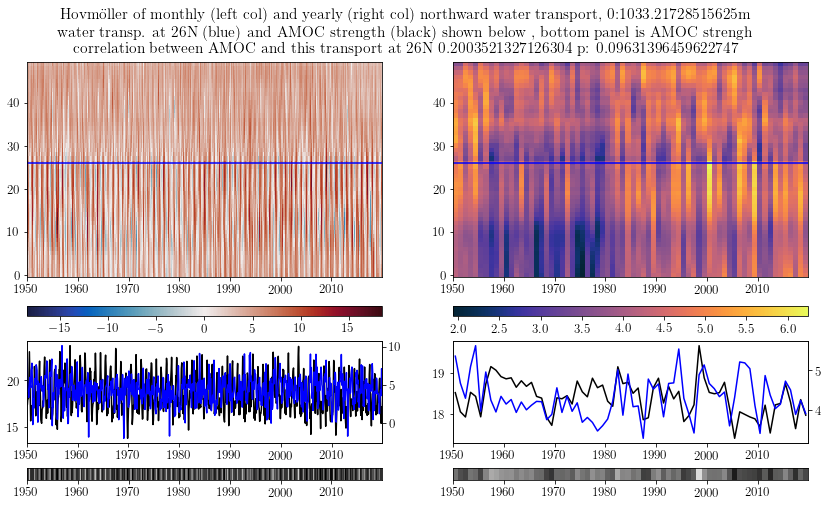

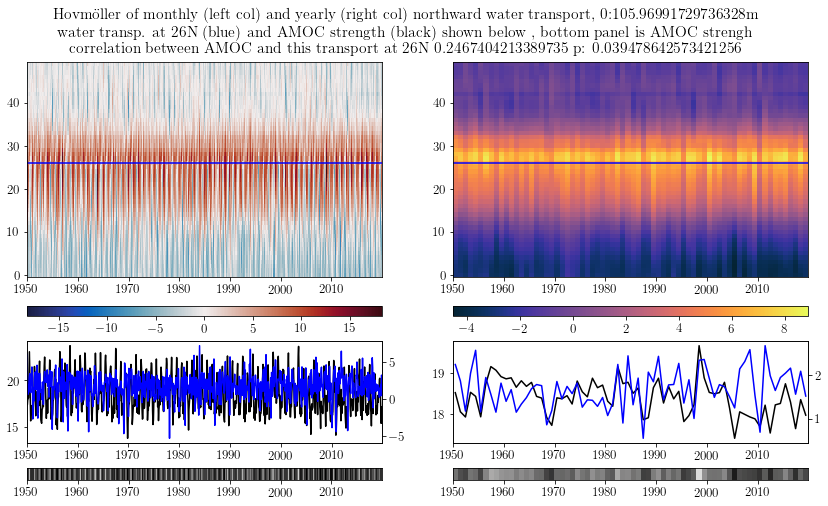

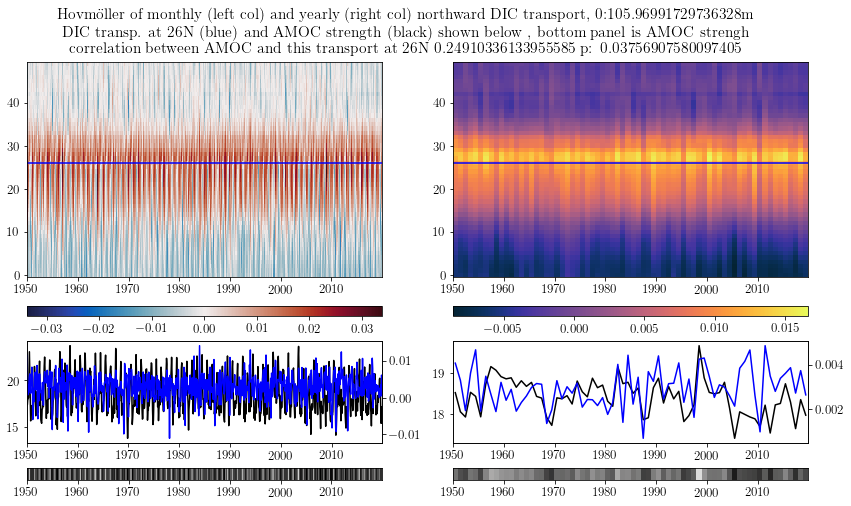

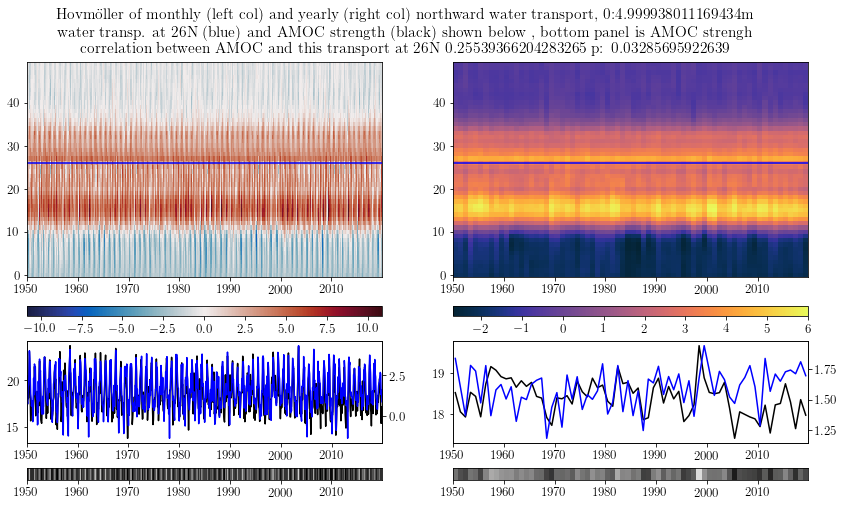

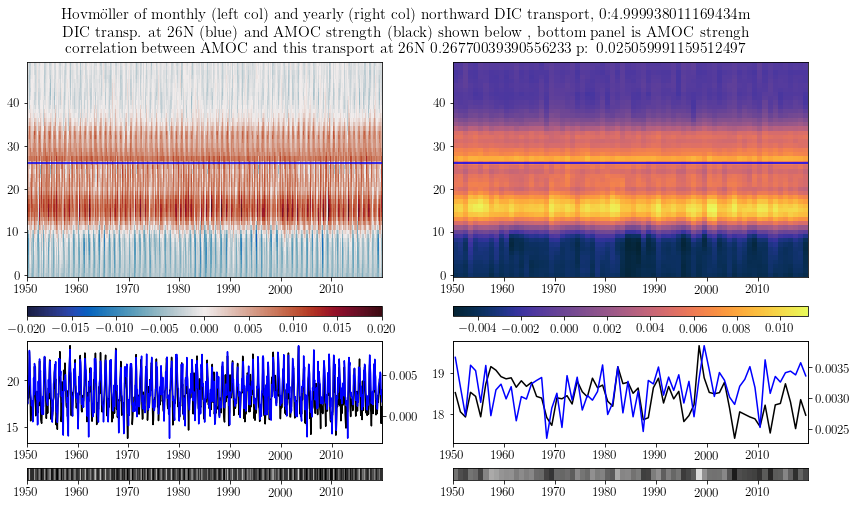

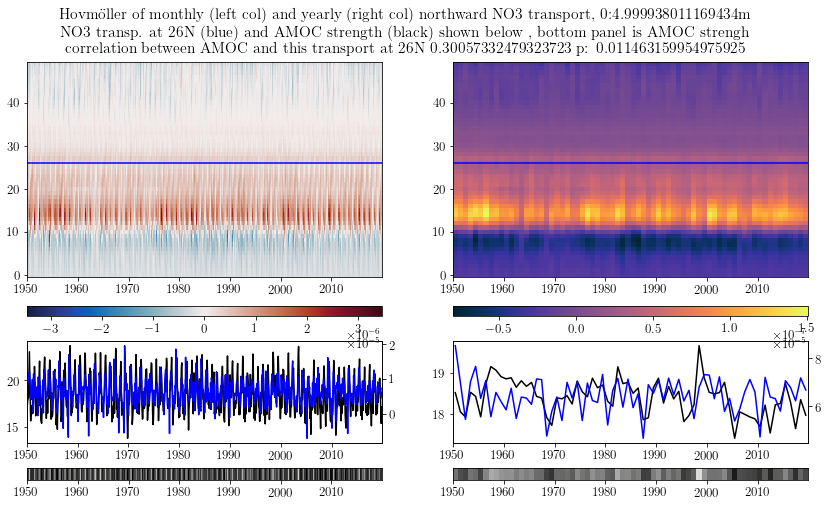

In [160]:
from scipy.stats import pearsonr


#####
def plot_hovno(tstr, d=21, trac = 'water'):
    
    q = xr.open_dataset('/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_RVA0/ORCA2_1m_19660101_19661231_ptrc_T.nc')
    dd = q.deptht.values
    tde = (dd[d])
    
    w = xr.open_dataset(tstr)
    RVA0_amoc = xr.open_dataset('/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/AMOC_TOM12_TJ_RVA0_1945-2022.nc')
    RVA0_vyrez = RVA0_amoc.AMOC.sel(TIME=slice(f'1950-01-01', f'2019-12-31'))
    for i in range(0,50):
        dat2[i,:] = RVA0_vyrez.values
    w['AMOC'] = w.transport.copy()
    w['AMOC'].values = dat2.T
    
    fact = 0.7
    fig = plt.figure(figsize=(20*fact, 11*fact))

    # Create a GridSpec with 3 rows and 1 column
    gs = gridspec.GridSpec(3, 2, height_ratios=[10, 4, 0.5])

    # Add subplots using the GridSpec layout
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[2, 0])
    ax4 = fig.add_subplot(gs[0, 1])
    ax5 = fig.add_subplot(gs[1, 1])
    ax6 = fig.add_subplot(gs[2, 1])


    # tp = (w.transport[:,:].values.T)
    tma = np.nanmax(w.transport.T/1e6)
    tmi = np.abs(np.nanmin(w.transport.T/1e6))
    tmx = np.nanmax([tma, tmi])
    q = ax1.pcolormesh(w.time_counter,w.lat,w.transport.T/1e6, vmin = -1*tmx, vmax = tmx, cmap = cm.balance)
    ax1.axhline(y=26, color = 'b')
    ax4.axhline(y=26, color = 'b')
    #plt.colorbar(q, ax = ax1, orientation = 'horizontal')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("bottom", size="5%", pad=0.4)
    # Step 5: Add a horizontal colorbar
    cbar = plt.colorbar(q, cax=cax, orientation='horizontal', fraction = 0.07, pad = 0.4)

    ax2.plot(w.time_counter, w.AMOC[:,0], color = 'k')
    ax2b = ax2.twinx()
    ax2b.plot(w.time_counter,w.transport.sel(lat = (34))/1e6 , color = 'b')

    correlation_coefficient, p = pearsonr(w.AMOC[:,0], w.transport.sel(lat = (34))/1e6)
    print(f'{correlation_coefficient}, {p}')

    ax2b.set_xlim([w.time_counter[0],w.time_counter[839]])


    q = ax3.pcolormesh(w.time_counter, w.lat, w.AMOC.T, vmin = 15, vmax = 25, cmap = cm.gray)


    ##
    tma = np.nanmax(w.transport.groupby('time_counter.year').mean().T/1e6)
    tmi = np.abs(np.nanmin(w.transport.groupby('time_counter.year').mean().T/1e6))
    tmx = np.nanmax([tma, tmi])
    q = ax4.pcolormesh(w.time_counter.groupby('time_counter.year').mean(),w.lat,w.transport.groupby('time_counter.year').mean().T/1e6, cmap = cm.thermal)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes("bottom", size="5%", pad=0.4)
    cbar = plt.colorbar(q, cax=cax, orientation='horizontal', fraction = 0.07, pad = 0.4)

    ax5.plot(w.time_counter.groupby('time_counter.year').mean(), w.AMOC[:,0].groupby('time_counter.year').mean(), color = 'k')
    ax5b = ax5.twinx()
    ax5b.plot(w.time_counter.groupby('time_counter.year').mean(),w.transport.groupby('time_counter.year').mean().sel(lat = (34))/1e6 , color = 'b')
    ax5b.set_xlim([w.time_counter[0],w.time_counter[839]])
    
    correlation_coefficient, p = pearsonr(w.AMOC[:,0].groupby('time_counter.year').mean(), w.transport.groupby('time_counter.year').mean().sel(lat = (34))/1e6 )
    print(f'{correlation_coefficient}, {p}')

    q = ax6.pcolormesh(w.time_counter.groupby('time_counter.year').mean(), w.lat, w.AMOC.groupby('time_counter.year').mean().T, vmin = 17, vmax = 20, cmap = cm.gray)


    ax3.set_yticks([])
    ax6.set_yticks([])
    
    plt.suptitle(f'Hovmöller of monthly (left col) and yearly (right col) northward {trac} transport, 0:{tde}m \n {trac} transp. at 26N (blue) and AMOC strength (black) shown below , bottom panel is AMOC strengh \n correlation between AMOC and this transport at 26N {correlation_coefficient} p: {p}')

tstr = './data/RVD0-water-net-transport_d21.nc'
plot_hovno(tstr, d = 21, trac = 'water')
tstr = './data/RVD0-water-net-transport_d10.nc'
plot_hovno(tstr, d = 10, trac = 'water')
tstr = './data/RVD0-DIC-net-transport_d10.nc'
plot_hovno(tstr, d = 10, trac = 'DIC')
tstr = './data/RVD0-water-net-transport_d0.nc'
plot_hovno(tstr, d = 0, trac = 'water')
tstr = './data/RVD0-DIC-net-transport_d0.nc'
plot_hovno(tstr, d = 0, trac = 'DIC')
tstr = './data/RVD0-NO3-net-transport_d0.nc'
plot_hovno(tstr, d = 0, trac = 'NO3')

<xarray.DataArray 'transport' (time_counter: 840)>
array([8332985.806126, 5461777.461576, 4196955.915506, ..., 3579485.524565,
       7095460.648502, 6830002.454436])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-01 ... 2019-12-01
    nav_lat       float32 25.36
Attributes:
    units:      m3/s
    long_name:

(101,)
(2,)
(1, 100)


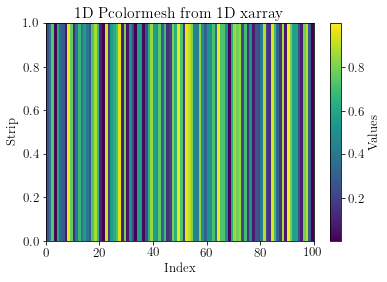